In [1]:
function Z(n::Int64, m::Int64)
    """In John's notes he includes a normalization, we have omitted that and are just following the conventions
    on Wikipedia."""
    function Z_at_point(ρ::Float64, ϕ::Float64)
        if m >= 0
            R(n, m, ρ) * cos(m * ϕ)
        else
            R(n, -m, ρ) * sin(-m * ϕ)
        end
    end
    Z_at_point
end
function plot_across_disk(f, discretization::Int64, radius::Float64)
    x = y = Array(range(-radius, radius, length=discretization))
    z = Array{typeof(f(0.,0.))}(UndefInitializer(), length(x), length(y))
    for (i, xx) in enumerate(x)
        for (j, yy) in enumerate(y)
            if xx^2 + yy^2 > radius^2
                if typeof(f(0.,0.)) == Tuple{Float64,Float64}
                    z[i, j] = (0.,0.)
                else
                    z[i, j] = 0.
                end
            else
                ρ = sqrt(xx^2 + yy^2)
                ϕ = atan(yy, xx)
                res = f(ρ, ϕ)
                z[i, j] = res
            end
        end
    end
    x, y, z
end

function R(n::Int64, m::Int64, ρ::Float64)
    if (n - m) % 2 != 0
        0
    else
        function summand(k)
            n = big(n)
            k = big(k)
            (-1)^k * factorial(n-k)/(factorial(k)*factorial(Int((n+m)/2) - k)*factorial(Int((n-m)/2) - k))*(ρ)^(n-2*k)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n-m)/2), step=1)))
    end
end

R (generic function with 1 method)

In [2]:
function radial_integral(n, m)
    if (n - m) % 2 != 0
        0
    else
        function summand(k)
            n = big(n)
            k = big(k)
            (-1)^k * factorial(n-k)/(factorial(k)*factorial(Int((n+m)/2) - k)*factorial(Int((n-m)/2) - k)) * 1/(n-2*k+2)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n-m)/2), step=1)))
    end
end
function angular_integral(n, m)
    if m >= 0 && m % 2 == 0
        0
    elseif m >=0 && m % 2 == 1
        4 * sin(π/2 * m) / m
    elseif m < 0 && m % 2 == -1
        0
    else 
        0
    end
end

function total_integral(n, m)
    angular_integral(n, m) * radial_integral(n, abs(m))
end

total_integral (generic function with 1 method)

In [3]:
using Plots

function reconstruct_step(max_n, radius, discretization)
    xx, yy, total = plot_across_disk((ρ, ϕ) -> 0., discretization, radius)
    for n in range(0, max_n, step=1)
        for m in range(-n, n, step=1)
            if m == 0
                scalar = 2
            else
                scalar = 1
            end
            total += plot_across_disk(Z(n, m), discretization, radius)[3] * total_integral(n, m) * (2*n + 2) / π /scalar
        end
    end
    xx, yy, total
end

reconstruct_step (generic function with 1 method)

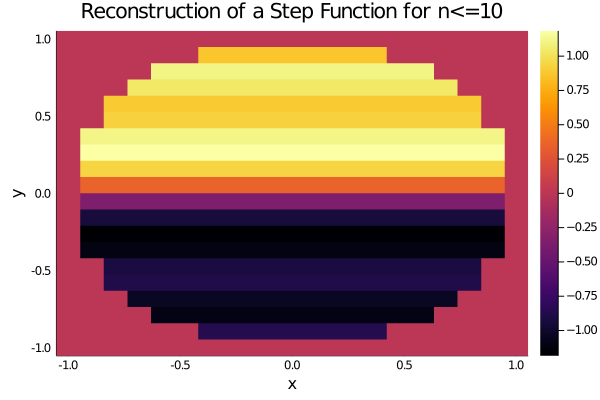

In [6]:
heatmap(reconstruct_step(10, 1., 20), xlabel="x", ylabel="y", title="Reconstruction of a Step Function for n<=10")

In [5]:
discretization = 40
function step_func(x)
    if x > 0
        1
    else
        -1
    end
end
xs = collect(range(-1, 1, length=discretization))
ys = [step_func(x) for x in xs]
n5 = reconstruct_step(5, radius, discretization)[3][:, Int(discretization/2)]
n10 = reconstruct_step(10, radius, discretization)[3][:, Int(discretization/2)]
n20 = reconstruct_step(20, radius, discretization)[3][:, Int(discretization/2)]
plot(xs, [ys, n5, n10, n20], labels=["Actual" "n=5" "n=10" "n=15"], xlabel="y", title="Reconstruction of step function, 1D slice down the middle.")

LoadError: UndefVarError: radius not defined